
[Out]: Data Loaded Successfully.

[Out]: Preprocessing done.

[Out]: Training data shape:  (60000, 28, 28)
[Out]: Training label data shape:  (60000,)
[Out]: Test data shape:  (60000, 28, 28)
[Out]: Training label data shape:  (60000,)
[Out]: Plotting images


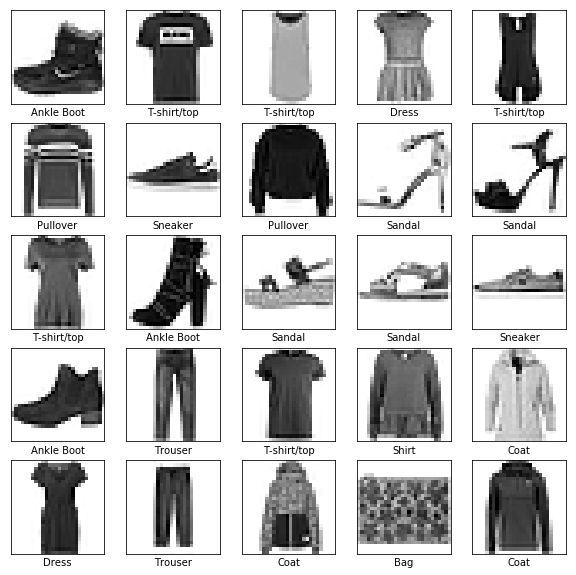

[Out]: Model Summary:
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
[Out]: Model creation and compilation successful. 
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4922 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3718 - accuracy: 0.8666
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sa

In [14]:
from __future__ import absolute_import,print_function,division,unicode_literals
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


class fashion_mnist:
  def __init__(self):
    self.epoch=0
    self.class_name=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

  def load_data(self):
    #loading data
    fashion_mnist=keras.datasets.fashion_mnist
    (self.train_img,self.train_lab),(self.test_img,self.test_lab)=fashion_mnist.load_data()
    
    print("\n[Out]: Data Loaded Successfully.")
    
  def preprocessing(self):
    #normalize 0-1
    self.train_img=self.train_img/255.0
    self.test_img=self.test_img/255.0
    print("\n[Out]: Preprocessing done.\n")
    
  def data_info(self):
    
    print("[Out]: Training data shape: ",self.train_img.shape)
    print("[Out]: Training label data shape: ",self.train_lab.shape)
    print("[Out]: Test data shape: ",self.train_img.shape)
    print("[Out]: Training label data shape: ",self.train_lab.shape)
    
  def show_data(self):
    print("[Out]: Plotting images")
    plt.figure(figsize=(10,10))
    for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(self.train_img[i],cmap=plt.cm.binary)
      plt.xlabel(self.class_name[self.train_lab[i]])
    plt.show()
    
  
  def create_model(self):
    
    #define layers
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(10,activation='softmax')
        ])
    #compile
    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print("[Out]: Model Summary:")
    
    model.summary()
    
    print("[Out]: Model creation and compilation successful. ")
    
    return model
  
  def train_model(self,model,epoch):
    self.epoch=epoch
    model.fit(self.train_img,self.train_lab,epochs=epoch)
    print("[Out]: Model now trained.")
    
  def evaluate_model(self,model):
    
    test_los,test_accu=model.evaluate(self.test_img,self.test_lab)
    
    print("[Out]: Model test loss:{} and  test accuracy:{} ".format(test_los,test_accu))
    
  def model_predict(self,model):
    print("[Out]: choose img:")
    n=int(input("::"))
    img=np.expand_dims(self.train_img[n],0)
    
    d=model.predict(img)
    print("[Out]: predicted label:",np.argmax(d))
    print("[Out]: actual model:",self.train_lab[n])
    
  def save_model(self,model):
    
    model.save("model_classification.h5")
    print("[Out]: Model saved.")
   
    
    
  
 
    
    
    
if __name__=="__main__":
  
  obj=fashion_mnist()
  obj.load_data()
  obj.preprocessing()
  obj.data_info()
  obj.show_data()
  model=obj.create_model()
  obj.train_model(model,10)
  obj.evaluate_model(model)
  obj.model_predict(model)
  #obj.save_model(model)